# Data Analysis with ACADEMY methodology
## Analyzing the Composition, the modal Abundance and the Density using Electron MicroscopY

Here is an example of what it is possible to do using the ACADEMY methodology. 
For more informations please read Zanetta et al,. 2018 
Don't hesitate to contact the author via Github or directly by email.

### Author 

19/09/2018 Pierre-marie Zanetta

### requirements

HyperSpy 1.3 and need to merge the Pull request #1835 and #1462

### Before you start: 
We first import the different pacakges necessary to run the whole code

In [1]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

To obtain a merged version that run the entire code it is possible to download the branch "v1.3_background_and_linear" on my personnal github repository:
https://github.com/ZanettaPM/hyperspy/tree/Master_merged

clone this repository on a github folder in your documents and remplace the path below

In [2]:
import imp
hs=imp.load_source("hyperspy", "D://Users/Documents/GitHub/ZanettaPM/hyperspy/hyperspy/__init__.py")
hs=imp.load_source("hyperspy.api", "D://Users/Documents/GitHub/ZanettaPM/hyperspy/hyperspy/api.py")

In [3]:
hs.hyperspy.Release.version

'1.4.dev'

## Table of contents:
* [1. Description of the sample and getting started](#first-bullet)
* [2. Background modeling and spectrum fitting strategy](#second-bullet)
* [3. Mineral map and MLLS procedure](#third-bullet)
* [4. Density determination through bremstrahlung modelling](#fourth-bullet)
* [5. Calculation of the bulk composition](#fifth-bullet)

## 1. Description of the sample and getting started<a class="anchor" id="first-bullet"></a>


The sample consists of a cropped area of the map "Zone 2" of the meteorite of Paris presented in the paper.
This sample is investigated using a FEG-SEM JEOL JSM-7800F LV at the University of Lille equipped with an EDX/EBSD Aztec system from Oxford Instruments and a silicon drift detector (SDD XMaxN) of 80 mm². 

Initially the raw file extracted from Aztech was composed of 3 files: ".msa", ".rpl" and the ".raw"
The ".msa" file contains a single pixel spectrum and the metadata to calibrate it. The ".rpl" is a header to read the ".raw". The ".raw" file contains an EDS/SEM spectral image.
These data have been cropped and converted into the hyperspy format ".hspy", and the metadata have been completed

In [4]:
s=hs.load("data.hspy")
s

<EDSSEMSpectrum, title: Map Sum Spectrum, dimensions: (97, 110|512)>

In [5]:
s.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 29.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 170393.59375
│       │       └── real_time = 210312.96875
│       ├── Stage
│       │   └── tilt_alpha = 0.0
│       ├── beam_energy = 5.0
│       └── magnification = X440
├── General
│   ├── date = 2017-01-24
│   ├── original_filename = Paris_section-6_Map2
│   ├── time = 17:42:00
│   └── title = Map Sum Spectrum
├── Sample
│   ├── elements = ['Al', 'C', 'Ca', 'Fe', 'Mg', 'Na', 'Ni', 'O', 'S', 'Si']
│   └── xray_lines = ['Al_Ka', 'C_Ka', 'Ca_La', 'Fe_La', 'Mg_Ka', 'Na_Ka', 'Ni_La', 'O_Ka', 'S_Ka', 'Si_Ka']
└── Signal
    ├── binned = True
    ├── quantity = X-rays (Counts)
    └── signal_type = EDS_SEM

We plot the hyperspectral signal and the different X-ray lines.
The signal have been calibrated in energy beforehand

<IPython.core.display.Javascript object>


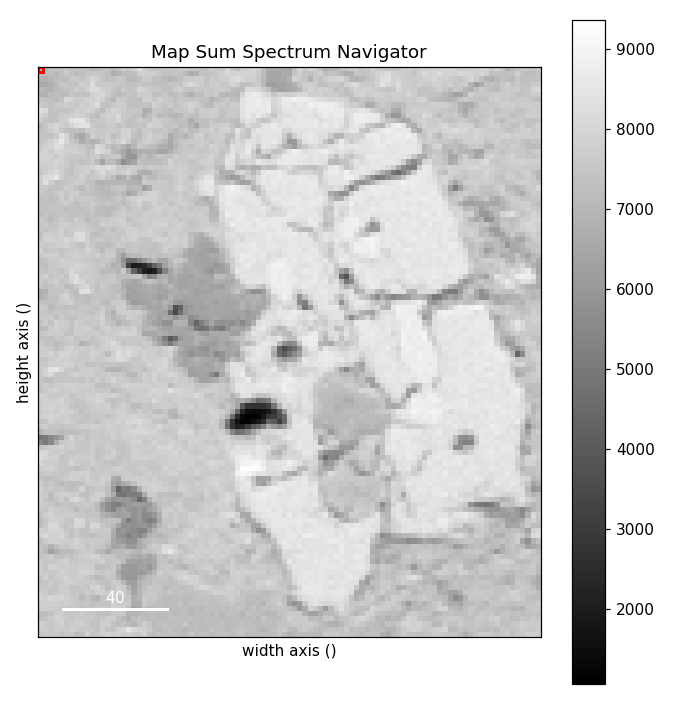

<IPython.core.display.Javascript object>


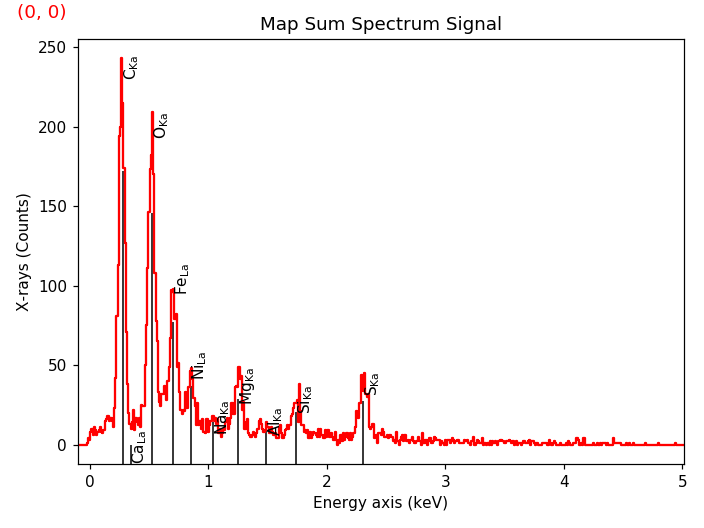

In [6]:
s.plot(True) 

## 2.	Background modeling and spectrum fitting strategy<a class="anchor" id="second-bullet"></a>

To obtain accurate elemental maps, we create a model to remove the background and we fit gaussian functions to the hyperspectral map.

The default background proposed by hyperspy is a polynome function. Here we don't use this components but we add another background taking into account the emission and the absorption within the sample and the detector. 
To see the code behind this component please refer to the pull request #1835

In [7]:
m=s.create_model(auto_background=False)

The thin window in front of our detector is a polymer window. We use the efficiency curve modelised beforehand.

In [8]:
m.add_physical_background(detector='Polymer_C',quantification=None)

In first instance we approximate the composition of each pixel based on the height of the peaks. This approximation is necessary to obtain a shape of of the background which fit well with the data.

In [9]:
m.components.Bremsstrahlung.initialize()

{'Quant map has been created'}

We print the differents components of the model and we can delete X-ray lines with weak intensity to speed up the fitting procedure.

In [10]:
m.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |               Al_Ka |               Al_Ka |            Gaussian
   1 |               Al_Kb |               Al_Kb |            Gaussian
   2 |                C_Ka |                C_Ka |            Gaussian
   3 |               Ca_Ka |               Ca_Ka |            Gaussian
   4 |               Ca_Kb |               Ca_Kb |            Gaussian
   5 |               Ca_La |               Ca_La |            Gaussian
   6 |               Ca_Ln |               Ca_Ln |            Gaussian
   7 |               Ca_Ll |               Ca_Ll |            Gaussian
   8 |               Fe_La |               Fe_La |            Gaussian
   9 |               Fe_Ll |               Fe_Ll |            Gaussian
  10 |              Fe_Lb3 |              Fe_Lb3 |            Gaussian
  11 |               Fe_Ln |               Fe_Ln |            Gaussian
  12 |

In [11]:
m.remove([1,6,7,9,10,11,13,15,20])

In [12]:
m.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |               Al_Ka |               Al_Ka |            Gaussian
   1 |                C_Ka |                C_Ka |            Gaussian
   2 |               Ca_Ka |               Ca_Ka |            Gaussian
   3 |               Ca_Kb |               Ca_Kb |            Gaussian
   4 |               Ca_La |               Ca_La |            Gaussian
   5 |               Fe_La |               Fe_La |            Gaussian
   6 |               Mg_Ka |               Mg_Ka |            Gaussian
   7 |               Na_Ka |               Na_Ka |            Gaussian
   8 |               Ni_La |               Ni_La |            Gaussian
   9 |               Ni_Ll |               Ni_Ll |            Gaussian
  10 |              Ni_Lb3 |              Ni_Lb3 |            Gaussian
  11 |               Ni_Ln |               Ni_Ln |            Gaussian
  12 |

Finally, we fit the background to the data. The background cannot be negative, in consequence we fix bounds. 

In [13]:
m.fit_background(kind='multi',bounded=True, windows_sigma=([3,3]))

And we fit the gaussians using the linear fit proposed by thomas aarholt (already merged in "v1.3_background_and_linear")
https://github.com/hyperspy/hyperspy/pull/1462

In [14]:
m.fix_background()

In [15]:
%%capture
m.set_parameters_value('A',1)
m.multifit(fitter='linear',bounded=True,grad=True)

<IPython.core.display.Javascript object>


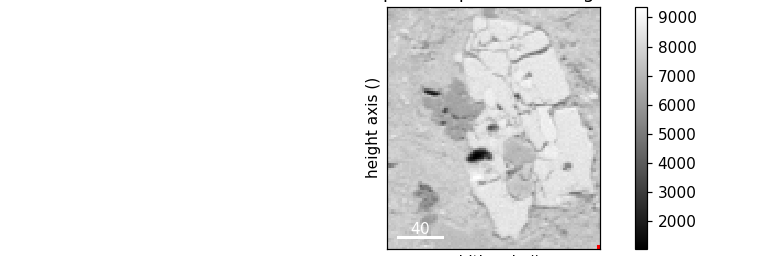

<IPython.core.display.Javascript object>


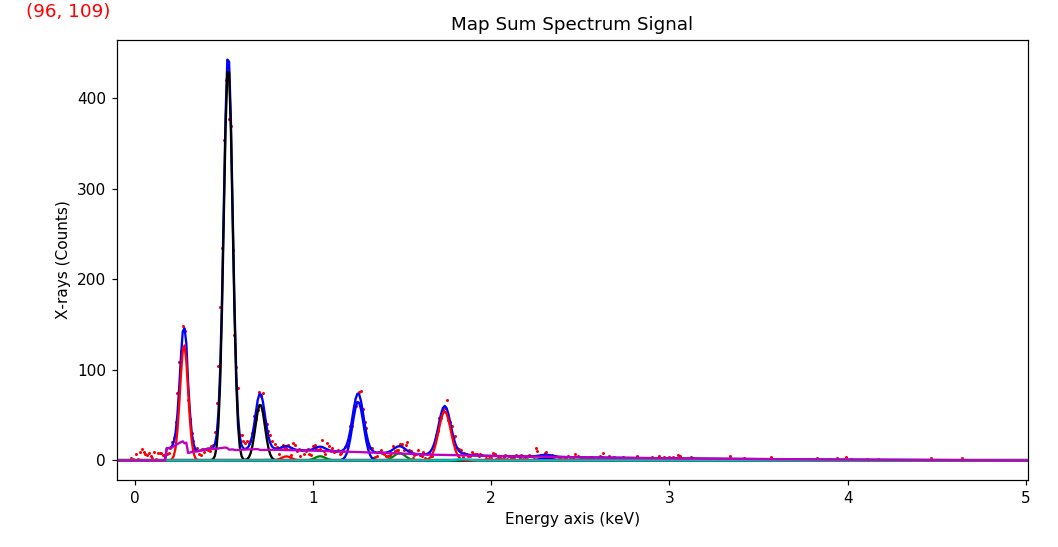

In [16]:
m.plot(plot_components=True)

We extract the different elementary map in order to use clustering methods to classify pixel of composition fields
Here we plot the Mg map corresponding to the integrated peak after the background removing

<IPython.core.display.Javascript object>


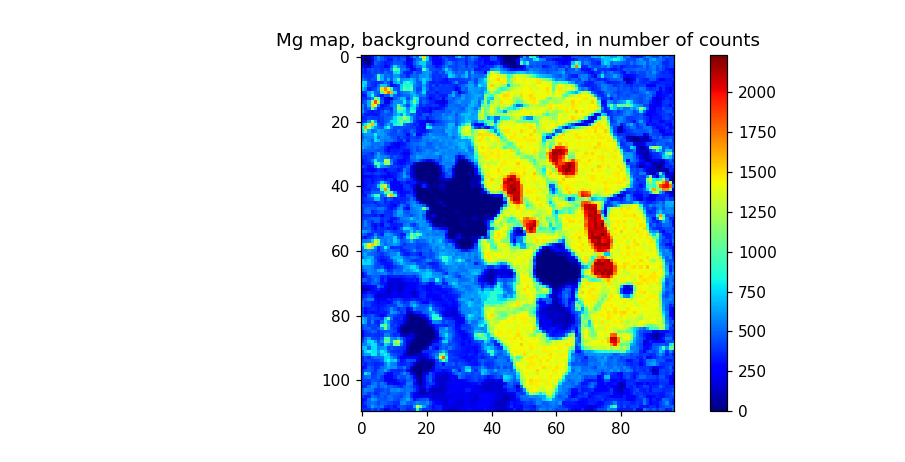

In [17]:
elemap=m.get_lines_intensity()
plt.figure()
plt.imshow(elemap[5],cmap='jet')
plt.title('Mg map, background corrected, in number of counts')
plt.colorbar()

## 3. Mineral map and MLLS procedure <a class="anchor" id="third-bullet"></a>

The phase map have been obtained using XmapTools software and manual refinement on matlab software. However, such clustering methods exist in python and have been proposed into hyperspy: 
https://github.com/hyperspy/hyperspy/pull/1353

Here to continue the example, a file containing the value of the map is provided in the repository of this tutorial

In [18]:
carto=hs.load('cartography.hspy')

In [19]:
phases=['Metal Grain','Olivine','Pyroxene','Fe-rich sulfides','Epoxy','Pentlandite','Mg-rich phyll/amorph','Fe-rich phyll/amorph','Carbonates'
,'Spinel','sulfates','Olivine (Fo<90)']

We first plot the phase map

<IPython.core.display.Javascript object>


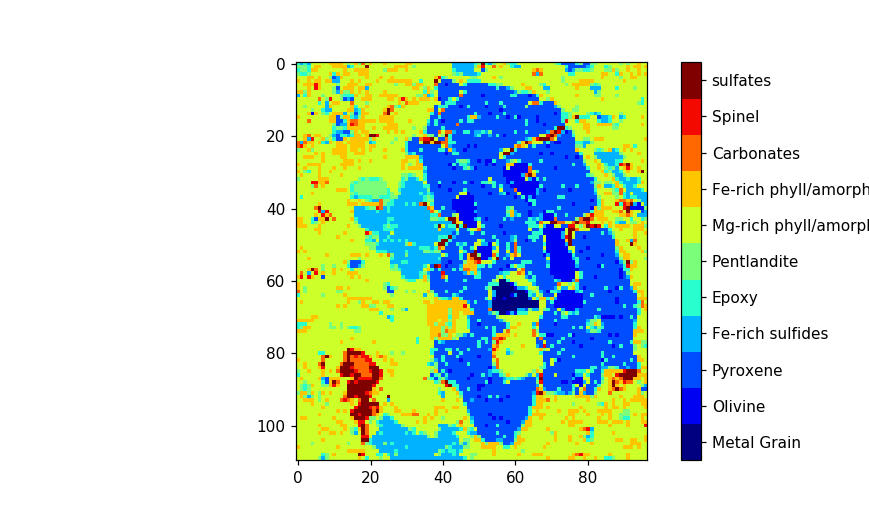

In [20]:
plt.figure()
plt.imshow(carto,plt.get_cmap('jet', 11))
cb = plt.colorbar()    
cb.set_ticks([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5])
cb.set_ticklabels(['Metal Grain','Olivine','Pyroxene','Fe-rich sulfides','Epoxy','Pentlandite','Mg-rich phyll/amorph','Fe-rich phyll/amorph','Carbonates'
,'Spinel','sulfates','Olivine (Fo<90)'])


We create a new model that will contain the refence spectra of the MLLS procedure

In [21]:
m2 = s.create_model(False,False)

Ideally we use selected spectrum from the reference grains. Here a simple mean spectrum from all pixels of each phase is calculated

In [22]:
carto=np.array(carto.data)
a=int(np.max(carto))
Sref=dict()
indice=dict()
for i in range (1,a+1):
    s2=s.data[carto==i]
    s2=hs.signals.EDSSEMSpectrum(s2)
    s2=s2.mean()
    s2.get_calibration_from(s) 
    s2.metadata=s.metadata 
    Sref[i]=s2
    indice[i]=i

One of the reference spectrum is plotted

<IPython.core.display.Javascript object>


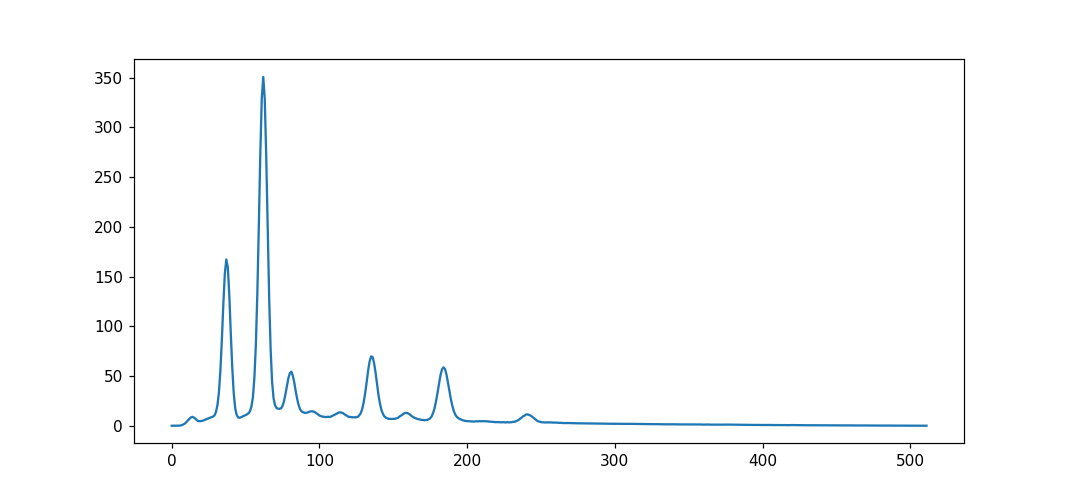

In [23]:
plt.figure()
plt.plot(Sref[8])

We add the reference spectra as component of the new model

In [24]:
for i in range (1,a+1):
    g=hs.model.components1D.ScalableFixedPattern(Sref[i])
    m2.extend([g])

In [25]:
m2.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
   1 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
   2 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
   3 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
   4 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
   5 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
   6 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
   7 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
   8 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
   9 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
  10 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..
  11 | ScalableFixedPatt.. | ScalableFixedPatt.. | ScalableFixedPatt..

The only free parameter is the Yscale, other are fixed. The yscale is bounded between 0 and 1 to obtain a percentage of the different phases

In [26]:
for i in range (0,len(m2)):
    m2.set_parameters_not_free([i], parameter_name_list=['xscale','shift'])
    m2.set_parameters_value('yscale',value=0.5,component_list=[i])
    m2[i].yscale.bmin=0
    m2[i].yscale.bmax=1

In [27]:
%%capture
m2.multifit(fitter='linear',bounded=True, grad=True)

We plot maps of "proportion in each pixel" of the different phases

<IPython.core.display.Javascript object>


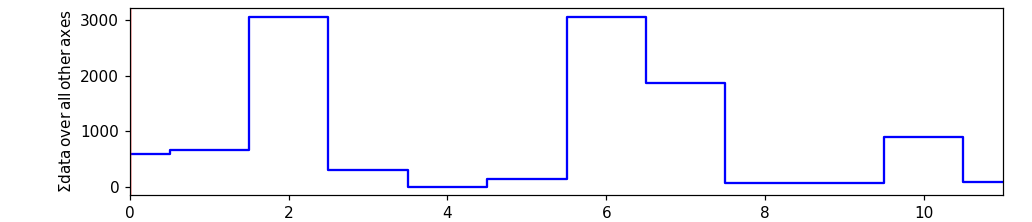

<IPython.core.display.Javascript object>


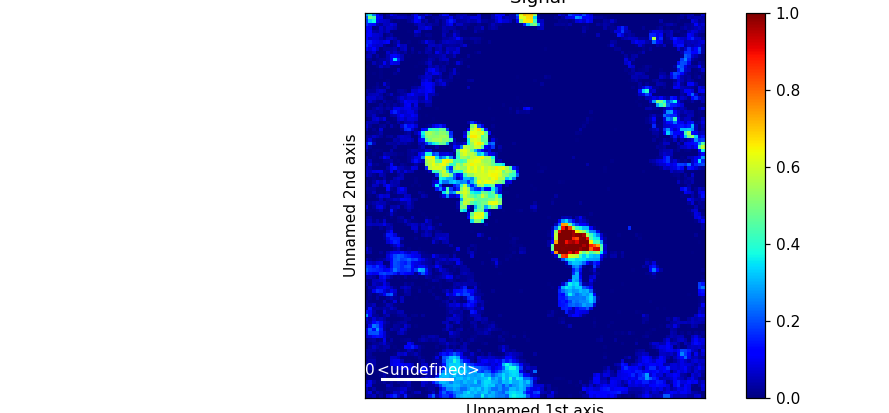

In [81]:
x=np.shape(carto)
mllsmap=np.empty([len(phases),x[0],x[1]])
mllsmap=hs.signals.BaseSignal(mllsmap)
for i in range(0,len(m2)):
    mllsmap.data[i,:,:]=m2[i].yscale.map['values']
mllsmap.as_signal1D(2)
mllsmap.transpose(signal_axes=(2)).plot(cmap='jet')

# 4. Density determination through bremstrahlung modelling <a class="anchor" id="fourth-bullet"></a>

We have now corrected our modal abundances and the different reference grains have been analyzed using EPMA. Thanks to this measurements we know the composition of the different phases. Thoses compositions will be used for the density measurement of the hyperspectral map. 

In [29]:
Metal_grain=[0,1,0,95,0,0,4,0,0,0]
Olivine=[0,1,0,1.7,30,0,0,43.28,0,18.7]
Pyroxene=[0,1,0,0,22.9,0,0,48.32,0,28.54]
Fe_sulfides=[0,1,0,55.94,0,0,3.80,0,34.6,0]
Epoxy=[0,70,0,0,0,0,0,30,0,0]
Pentlandite=[0,1,0,32.5,0,0,22.5,0,27.3,0]
Mg_phyll=[1.599,1,0.87,16.05,10.20,0.6,1.2,33.27,3.30,14.059]
Fe_phyll=[1.67,1,0.39,20.87,7.43,0.7,1.17,29.75,2.22,12.5572]
Carbonates=[0,40,39.46,1.11,0,0.3,0,17.31,0,0]
Spinel=[0,0,3.64,19.751,8,0,0,36.89,3.6,12.83]
Sulfate=[2,13.02,8.50,12.34,7.49,2,0,33.52,6,11]
Fayalite=[0,0,0,16,23.21,0,0,41.6,0,18.6]
Elmt=[Metal_grain,Olivine,Pyroxene,Fe_sulfides,Epoxy,Pentlandite,Mg_phyll,Fe_phyll,Carbonates,Spinel,Sulfate,Fayalite]

A mask with the spatial dimension of the map and with the spectral dimension of the number element is created

In [30]:
x=np.shape(carto)
mask2=[]
mask2=np.ones([x[0],x[1],10])
mask2=hs.signals.EDSSEMSpectrum(mask2)

<IPython.core.display.Javascript object>


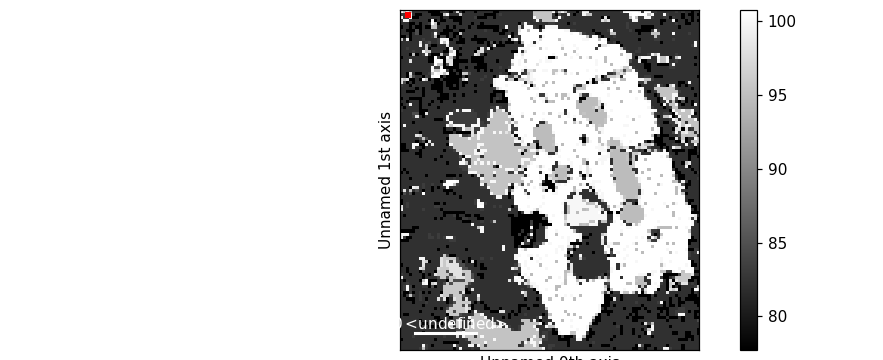

<IPython.core.display.Javascript object>


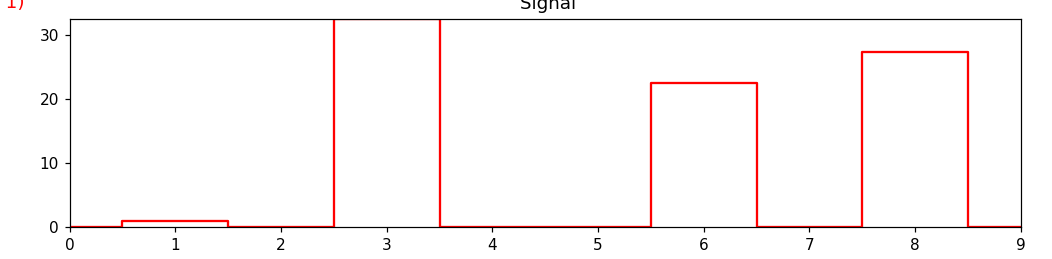

In [31]:
for i in range (0,12):
    a=np.where(carto==(i+1))
    x=np.shape(a)
    for u in range (0,x[1]):
        g=a[0]
        h=a[1]
        mask2.inav[h[u],g[u]] =Elmt[i]
mask2.plot()

In [32]:
quanti=np.array(mask2.data,float)
np.shape(quanti)

(110, 97, 10)

We create a new model again base on the same signal but this time we use de quantification

In [33]:
m3=s.create_model(auto_background=False)

In [34]:
m3.add_physical_background(detector='Polymer_C',quantification=quanti)

In [35]:
m3.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |               Al_Ka |               Al_Ka |            Gaussian
   1 |               Al_Kb |               Al_Kb |            Gaussian
   2 |                C_Ka |                C_Ka |            Gaussian
   3 |               Ca_Ka |               Ca_Ka |            Gaussian
   4 |               Ca_Kb |               Ca_Kb |            Gaussian
   5 |               Ca_La |               Ca_La |            Gaussian
   6 |               Ca_Ln |               Ca_Ln |            Gaussian
   7 |               Ca_Ll |               Ca_Ll |            Gaussian
   8 |               Fe_La |               Fe_La |            Gaussian
   9 |               Fe_Ll |               Fe_Ll |            Gaussian
  10 |              Fe_Lb3 |              Fe_Lb3 |            Gaussian
  11 |               Fe_Ln |               Fe_Ln |            Gaussian
  12 |

In [36]:
m3.remove([1,6,7,9,10,11,13,15,20])

In [37]:
m3.components.Bremsstrahlung.initialize()

{'Quant map has been created'}

In [38]:
%%capture
m3.fit_background(kind='multi',bounded=True, windows_sigma=[3,3])

<IPython.core.display.Javascript object>


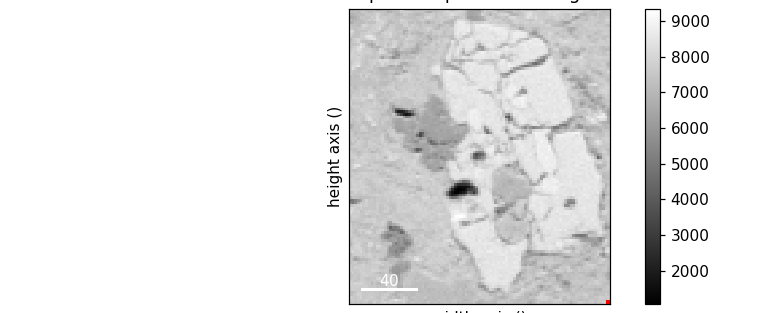

<IPython.core.display.Javascript object>


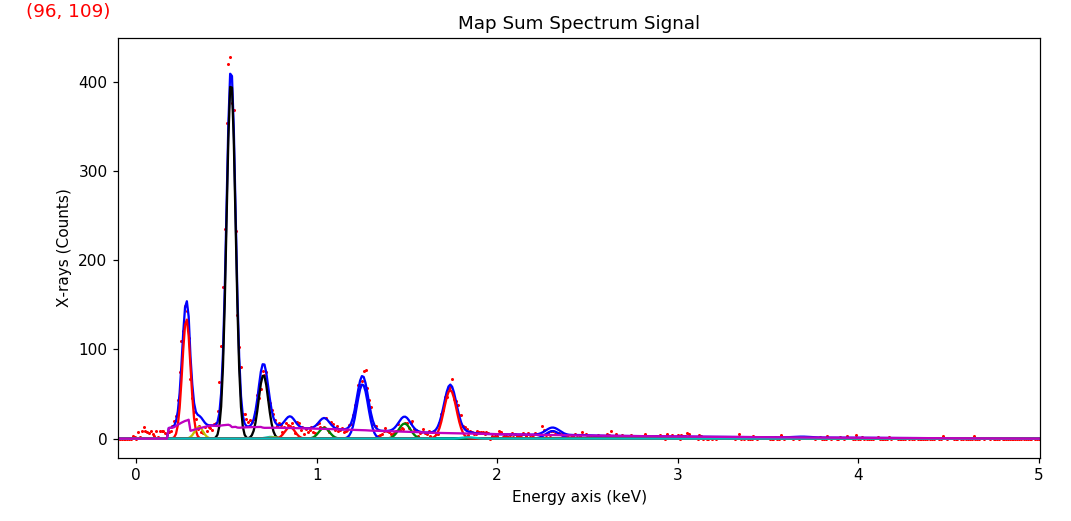

In [39]:
m3.plot(plot_components=True)

The formulation of the function physical_background is : 

                                    IBr=KZ(E0-E)/E * 1-e^(-2χρx)/2χρx * C * W

The ρx is a free parameter fitted to the data during the multifit of the model m3

The result of the fit is contain in the parameter 'coefficients' of the Bremsstralhung component:

<IPython.core.display.Javascript object>


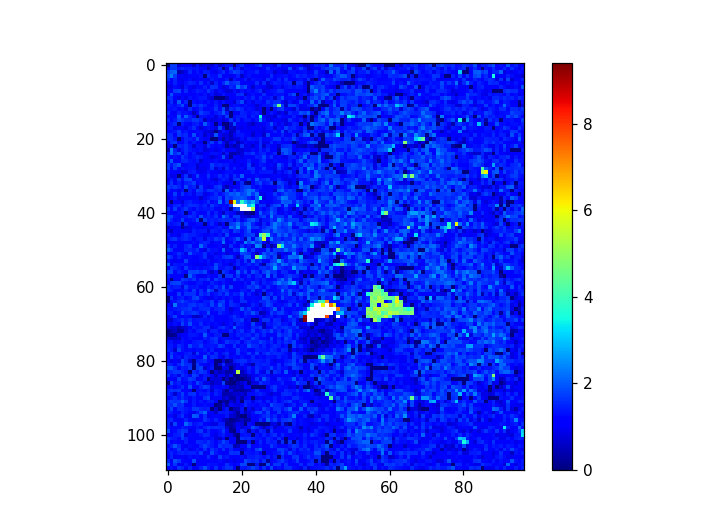

In [52]:
coef=(m3.components.Bremsstrahlung.coefficients.map['values'][:][:][:])
mask=coef[:,:,0]>10
coef[:,:,0][mask]=np.nan
plt.figure()
plt.imshow(coef[:,:,0],cmap='jet')
plt.colorbar()

We create a map of the nominal density of the different phases to compare the proxy fitted to the real density

<IPython.core.display.Javascript object>


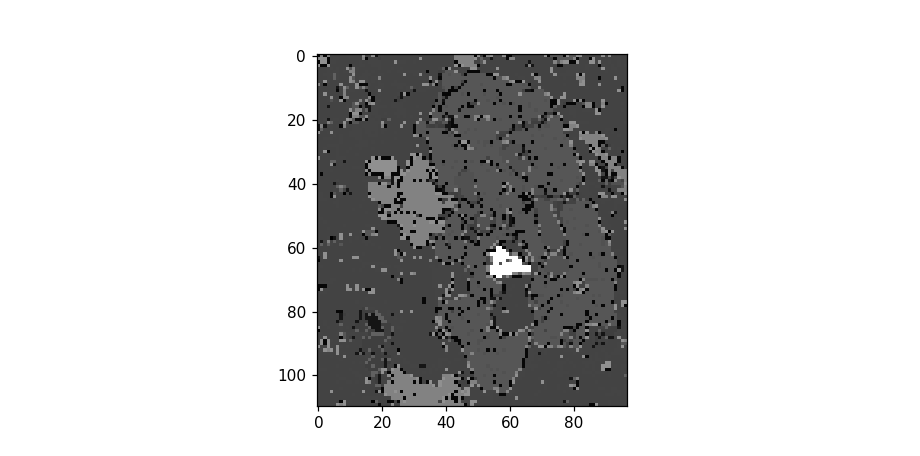

In [53]:
Density=[8.1,3.27,3.4,4.61,1.2,5,2.88,2.9,1.6,3.72,2.75,4]
x=np.shape(carto)
Dnom=np.ones([x[0],x[1],1])
Dnom=hs.signals.Signal1D(Dnom)


for i in range (1,np.max(carto)):
    a=np.where(carto==(i))
    x=np.shape(a)
    for u in range (0,x[1]):
        g=a[0]
        h=a[1]
        Dnom.inav[h[u],g[u]] =Density[i-1]
        
plt.figure()
plt.imshow(Dnom.data[:,:,0])

We calculate the mean value of the proxy for each phase to plot those results in 2D

In [54]:
Density=np.empty(np.max(carto))
Proxy=np.empty(np.max(carto))
for i in range (1,np.max(carto)):
    mask=carto==i
    Density[i]=np.nanmean(Dnom.data[:,:,0][mask])
    Proxy[i]=np.nanmean(coef[:,:,0][mask])

We calculate the linear regression to finally find the density of the of the amorphous/ phyllosilicate material.
Give that the number of pixels is really low and concentrated on a chondrule fragment the correlation is low

Do you want to plot the label of phases ? y/n
y


<IPython.core.display.Javascript object>


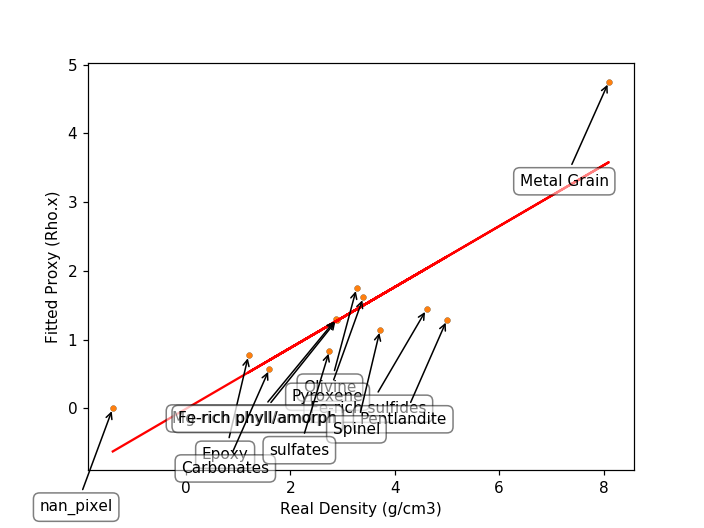

In [55]:
print('Do you want to plot the label of phases ? y/n')
test=input()
plt.figure()
plt.plot(Density,Proxy,'.')
from scipy import stats
x=np.transpose(Density)
y=Proxy

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, y, '.', label='data')
plt.plot(x, intercept + slope*x, 'r', label='fit')

if test=='y':
    labels=phases.copy()
    labels.insert(0,'nan_pixel')
    for label, x, y in zip(labels,x,y):
        plt.annotate(label,
            xy=(x, y), xytext=(0, -70),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.xlabel('Real Density (g/cm3)')
    plt.ylabel('Fitted Proxy (Rho.x)')
else:  
    plt.xlabel('Real Density (g/cm3)')
    plt.ylabel('Fitted Proxy (Rho.x)')
#plt.title('Density proxy compare to real density')


We finally calculate the density map in function of the fitted proxy thanks to the linear relation between the two parameter

<IPython.core.display.Javascript object>


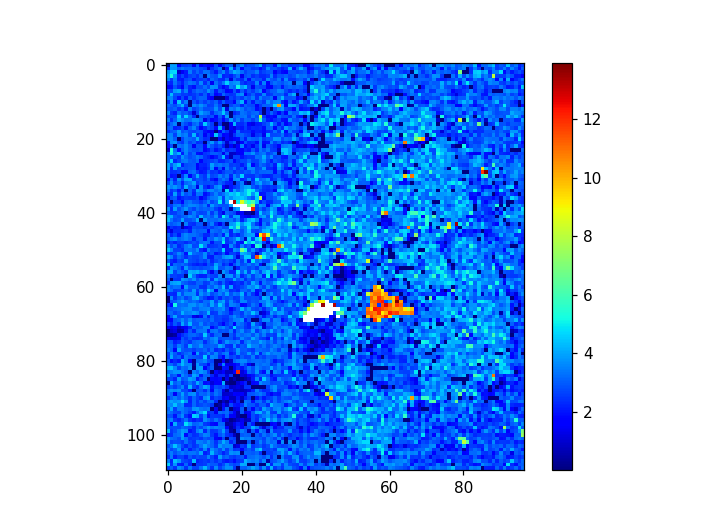

In [56]:
a=slope
b=intercept
Dcalc=((coef[:,:,0]-intercept)/slope)
mask=Dcalc>15
Dcalc[mask]=np.nan
plt.figure()
plt.imshow(Dcalc,cmap='jet')
plt.colorbar()

## 5. Calculation of the bulk composition <a class="anchor" id="fifth-bullet"></a>

We combine the modal abundance, the chemical composition and the density of each phase to calculate the bulk composition of the analyzed region 

We first extract the modal abundances from the MLLS procedure
And the density from the density map

In [57]:
AMfinal=np.ones(np.max(carto)-1)
for i in range (1,np.max(carto)):
    a=np.sum(m2[i].yscale.map['values']);
    AMfinal[i-1]=a/(s.axes_manager[0].size*s.axes_manager[1].size)

In [58]:
Dfinal=np.ones(np.max(carto)-1)
for i in range (1,np.max(carto)):
    maskD=Dcalc[carto==i]
    Dfinal[i-1]=np.nanmean(maskD)

In [59]:
print('|-----------------------------------------------------------------------|')
print('|                         Mineral mapping results                       |')
print('|-----------------------------------------------------------------------|')
print('|----------------------|------------------------|-----------------------|')
print('|         Phases       | Modal Abundances in %  |   Density in g/cm3    |')
for i in range (0,np.max(carto)-1):
    print('| {:20} |         {:.2f}           |         {:.2f}          |'.format(phases[i],AMfinal[i],Dfinal[i]))
print('|----------------------|------------------------|-----------------------|')

|-----------------------------------------------------------------------|
|                         Mineral mapping results                       |
|-----------------------------------------------------------------------|
|----------------------|------------------------|-----------------------|
|         Phases       | Modal Abundances in %  |   Density in g/cm3    |
| Metal Grain          |         0.06           |         10.74          |
| Olivine              |         0.29           |         3.96          |
| Pyroxene             |         0.03           |         3.66          |
| Fe-rich sulfides     |         0.00           |         3.27          |
| Epoxy                |         0.01           |         1.71          |
| Pentlandite          |         0.29           |         2.92          |
| Mg-rich phyll/amorph |         0.18           |         2.95          |
| Fe-rich phyll/amorph |         0.01           |         2.85          |
| Carbonates           |         0.01

Finally we combine the three parameter to calculate the bulk composition:

In [60]:
BulkQuant=np.empty([len(s.metadata.Sample.elements)])
for i in range (0,np.max(carto)-1):        
    for k in range (0,len(s.metadata.Sample.elements)):
        BulkQuant[k]+=(AMfinal[i]*Dfinal[i]/np.mean(Dfinal))*Elmt[i][k]
BulkQuant=BulkQuant/np.sum(BulkQuant)*100

In [61]:
print('|-------------------------------|')
print('|      Global compositions      |')
print('|-------------------------------|')
print('|     Elements  |   Qti in Wt%  |')
print('|---------------|---------------|')
for i in range (0,len(s.metadata.Sample.elements)):
    print('|  {:3} (Wt. %)  |     {:5.2f}     |'.format(s.metadata.Sample.elements[i],BulkQuant[i]))
print('|---------------|---------------|')
print('|     Total     |    {:5.2f}     |'.format(np.sum(BulkQuant)))
print('|---------------|---------------|')

|-------------------------------|
|      Global compositions      |
|-------------------------------|
|     Elements  |   Qti in Wt%  |
|---------------|---------------|
|  Al  (Wt. %)  |      0.26     |
|  C   (Wt. %)  |      1.61     |
|  Ca  (Wt. %)  |      1.54     |
|  Fe  (Wt. %)  |     31.56     |
|  Mg  (Wt. %)  |     14.06     |
|  Na  (Wt. %)  |      1.13     |
|  Ni  (Wt. %)  |      6.59     |
|  O   (Wt. %)  |     25.28     |
|  S   (Wt. %)  |      7.61     |
|  Si  (Wt. %)  |     10.35     |
|---------------|---------------|
|     Total     |    100.00     |
|---------------|---------------|


Again, give that the number of pixels is really low and concentrated on a chondrule fragment with many sulfide the composition is quite far from the chondritic composition